<h1> Mercari Price Suggestion Challenge <h1/>

# <h1> 1. Business Problem: </h1>

## <h2> 1.1 Description: </h2>

Mercari, Japan’s biggest community-powered shopping app, likes to offer pricing suggestions to the sellers on its platform, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

Product pricing gets even harder at scale, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs. Pricing of products in the market varies on various factors and also on how it is being presented to the user. 

-	Some items on Mercari cannot be sold if their listing prices are too high compared to the market price.
-	Conversely, if the listing price is lower than the market price then customers lose out.
-	Suggestion of fair prices for products based on different factors allows the sellers to evaluate the quality of their products and sell their products for a fair price. 
-	This could help the sellers have a fair intuition about the price of their products in the market and adjust the selling prices accordingly. This inturn helps sellers as well buyers have a great experience on the platform.

## <h2> 1.2 Problem Statement: </h2>

In this competition, Mercari challenges to build an algorithm that automatically suggests the right product prices given the details about the product such as:
- User-inputted product name and text descriptions of the products
- Product category name
- Brand name
- Item condition
- Details on item shipping


## <h2> 1.3 Sources/Useful Links:</h2>

- Source : https://www.kaggle.com/c/mercari-price-suggestion-challenge/overview
<br><br>____ Useful Links ____
- Kaggle Winning Solution:
    - https://www.kaggle.com/lopuhin/mercari-golf-0-3875-cv-in-75-loc-1900-s/script
    - https://youtu.be/QFR0IHbzA30
-  Other Approaches:
    - https://www.kaggle.com/gspmoreira/cnn-glove-single-model-private-lb-0-41117-35th
    - https://www.kaggle.com/valkling/mercari-rnn-2ridge-models-with-notes-0-42755#RNN-Model
    - https://www.kaggle.com/tunguz/more-effective-ridge-lgbm-script-lb-0-44823
- EDA
    - https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling


## <h2> 1.4 Real World / Business Objectives and Constraints: </h2>

- There is No strict latency constraints. 
But there is some low latency constraints, the price prediction can take couple of minutes but not too long.
- Interpretability is partially important.
- The prediction prices should be as close as possible to the market price of the product considering various factors of the item. 
- A very high error (either prediction price being too high or too low than the market price) can result is bad experience to its users and the platform losing out its user base. 
    - Higher price prediction than the value can result in seller not being able to sell his product and buyers not being able to find their desired product at fair price.
    - Lower price prediction than the market value can result in a loss to seller.

# <h1>2. Machine Learning Problem Formulation:</h1>

## <h2>2.1 Data:</h2>

### <h3>2.1.1 Data Overview:</h3>

- Source: https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

__Files__: 
- Train Data - train.tsv
- Test Data - test.tsv and test_stg2.tsv




__Columns__:

The train data consists of around 1.5 million rows.
The columns are:
<pre>
<br/>- <b>train_id or test_id</b> - the id of the listing.
<br/>- <b>name</b> - the title of the listing. 
<br/>- <b>item_description</b> - the full description of the item.
<br/>- <b>item_condition_id</b> - the condition of the items provided by the seller. Ranges from 1-5 (New(1) to Poor(5))
<br/>- <b>category_name</b> - category of the listing
<br/>- <b>brand_name</b> - brand name of the product.
<br/>- <b>shipping</b> - 1 if shipping fee is paid by seller and 0 by buyer.
<br/>- <b>price</b> - the price that the item was sold for. This is the target variable that you will predict. The unit is USD.

Note that the 'name' and 'item_description' columns in data is cleaned to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]
</pre>

### <h3>2.1.2 Example Data point: </h3>

<pre>
train_id                                                       10
name                                              Smashbox primer
item_condition_id                                               2
category_name                                  Beauty/Makeup/Face
brand_name                                               Smashbox
price                                                           8
shipping                                                        1
item_description     0.25 oz Full size is 1oz for [rm] in Sephora
Name: 10, dtype: object
</pre>

## <h2>2.2 Mapping the real-world problem to a Machine Learning Problem: </h2>

### <h3> 2.2.1 Type of Machine Learning Problem: </h3>

It is a Regression problem to predict the sale price of a product based on the user(seller) provided information for the product listing.

### <h3>2.2.2 Performance metric: </h3>

Ref: https://www.kaggle.com/c/mercari-price-suggestion-challenge/overview/evaluation

The evaluation metric for this competition is Root Mean Squared Logarithmic Error. 

The RMSLE is calculated as:

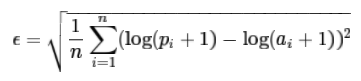

Where:

- epsilon -> is the RMSLE value.
- n -> is the total number of observations.
- p_i -> is your prediction of price for item i.
- a_i -> is the actual sale price for item i
- log x -> is the natural logarithm of x.


A good read on RMSLE: https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
* RMSLE reduces the effect of outliers on the final error calculations. 
* Log reduces the range of values a numerical data could have and it helps in easily analysing the data having values over a wider range.
* The prices of products on Mercari platform could have a wider range of values. Log reduces a large significant contribution to error calculation that could have been ccaused by wrong predictions of few products. This allows us to have importance for errors caused by all predicted product prices(predicted prices having higher deviation from actual price and predicted prices having lower deviation from predicted price) almost equally in the final evaluation metric results.

<h1> Downloading and Extracting data:<h1 />

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7559/44327/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1662392031&Signature=q1H6atnrtBlVTX%2FSPDKP8QUzS4GJSgmV2slyQcgC7%2FW0fJapOXt9WxHu6qwBmozKarLseF2zGPYefOMLPiVnckUZmig%2Bh%2FH5U6R%2BhWwbgzh3ZP3A4EgMo9m%2BXSkDtcA7E1LzTtYVREapmIaGftQxg1CaJVK%2Bv6Zk2v0QH4DIbS%2F7Z8mf230cYHLP8rSVPbL7E9LTuS2BfxKzVft32H1B625BDmbpIftupxQCdfIR6fI5jmRCKl82m5nnbocKrBNCe0%2BW6erar%2FShmemPdEObuMQlX71LhlVSb7%2FX1RXkK7W8pGXi%2FtvtahIj5KBbmqpE1AljRcTFQWPEmHjNGJ8uUA%3D%3D&response-content-disposition=attachment%3B+filename%3Dmercari-price-suggestion-challenge.zip" -c -O 'mercari-price-suggestion-challenge.zip'

--2022-09-04 05:34:30--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7559/44327/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1662392031&Signature=q1H6atnrtBlVTX%2FSPDKP8QUzS4GJSgmV2slyQcgC7%2FW0fJapOXt9WxHu6qwBmozKarLseF2zGPYefOMLPiVnckUZmig%2Bh%2FH5U6R%2BhWwbgzh3ZP3A4EgMo9m%2BXSkDtcA7E1LzTtYVREapmIaGftQxg1CaJVK%2Bv6Zk2v0QH4DIbS%2F7Z8mf230cYHLP8rSVPbL7E9LTuS2BfxKzVft32H1B625BDmbpIftupxQCdfIR6fI5jmRCKl82m5nnbocKrBNCe0%2BW6erar%2FShmemPdEObuMQlX71LhlVSb7%2FX1RXkK7W8pGXi%2FtvtahIj5KBbmqpE1AljRcTFQWPEmHjNGJ8uUA%3D%3D&response-content-disposition=attachment%3B+filename%3Dmercari-price-suggestion-challenge.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 422739618 (403M) [application/zip]
Saving to: ‘mercari-pr

In [ ]:
!unzip mercari-price-suggestion-challenge.zip
!7z x train.tsv.7z -o*
!7z x test.tsv.7z -o*
!7z x test_stg2.tsv.zip -o*

import os
os.remove("/content/mercari-price-suggestion-challenge.zip")
os.remove("/content/sample_submission.csv.7z")
os.remove("/content/sample_submission_stg2.csv.zip")
os.remove("/content/test.tsv.7z")
os.remove("/content/train.tsv.7z")
os.remove("/content/test_stg2.tsv.zip")

import shutil
shutil.rmtree("sample_data")

Archive:  mercari-price-suggestion-challenge.zip
  inflating: sample_submission.csv.7z  
  inflating: sample_submission_stg2.csv.zip  
  inflating: test.tsv.7z             
  inflating: test_stg2.tsv.zip       
  inflating: train.tsv.7z            

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77912192 bytes (75 MiB)

Extracting archive: train.tsv.7z
--
Path = train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      2% - train.tsv                  4% - train.tsv                  7% - train.tsv                  9% - train.tsv                 11% - train.tsv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1> Importing Libraries:<h1/>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from prettytable import PrettyTable
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import re
import string
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# <h1> 3. Exploratory Data Analysis: </h1>

In [ ]:
train_df = pd.read_csv('train.tsv/train.tsv', sep='\t')

In [ ]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## <h2> 3.1 High Level Statistics of Dataset and Data Preparation:</h2>


In [ ]:
train_df.shape

(1482535, 8)

In [ ]:
# Deduplication of entries

train_df.drop_duplicates(subset={"name", "item_condition_id",
                                 "category_name", "brand_name",
                                 "price", "shipping", "item_description"}, 
                         keep='first', inplace=True)
train_df.shape

(1482486, 8)

- **There were 49 duplicate entries.**

In [ ]:
# Presence of Null values

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482486 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482486 non-null  int64  
 1   name               1482486 non-null  object 
 2   item_condition_id  1482486 non-null  int64  
 3   category_name      1476159 non-null  object 
 4   brand_name         849845 non-null   object 
 5   price              1482486 non-null  float64
 6   shipping           1482486 non-null  int64  
 7   item_description   1482482 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 101.8+ MB


- **category_name, brand_name and item_description have Null values.**

In [ ]:
print("Null values in 'category_name'   : {0} ({1} %)".format(
    train_df["category_name"].isnull().sum(),
    round((train_df["category_name"].isnull().sum()/
           train_df["category_name"].shape[0])*100, 4))
    )
print("Null values in 'brand_name'      : {0} ({1} %)".format(
    train_df["brand_name"].isnull().sum(),
    round((train_df["brand_name"].isnull().sum()/
           train_df["brand_name"].shape[0])*100, 4))
    )
print("Null values in 'item_description': {0} ({1} %)".format(
    train_df["item_description"].isnull().sum(),
    round((train_df["item_description"].isnull().sum()/
           train_df["item_description"].shape[0])*100, 4))
    )

Null values in 'category_name'   : 6327 (0.4268 %)
Null values in 'brand_name'      : 632641 (42.6743 %)
Null values in 'item_description': 4 (0.0003 %)


- **42.67% of the data points have "brand_name" missing.**

**Observations:**

1. Total rows in the dataset after removing duplicates = 1482486. This amount of data is sufficient for modelling.
2. "category_name", "brand_name" and "item_description" columns have Null values..
3. 42.67% of data points have "brand_name" missing.


## <h2> 3.2 Target Variable: Price</h2>


### <h3>3.2.1 PDF:</h3>

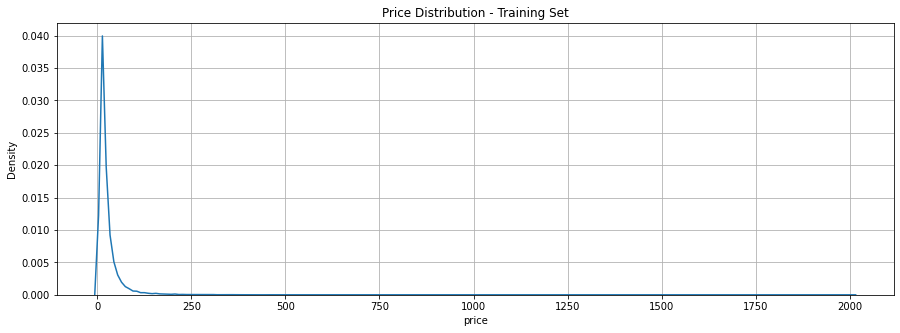

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Price Distribution - Training Set')
plt.grid()

sns.kdeplot(train_df['price'])

In [ ]:
train_df["price"].describe()

count    1.482486e+06
mean     2.673804e+01
std      3.858658e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

- **Distribution is heavily skewed to right.**

### <h3>3.2.2 CDF:</h3>

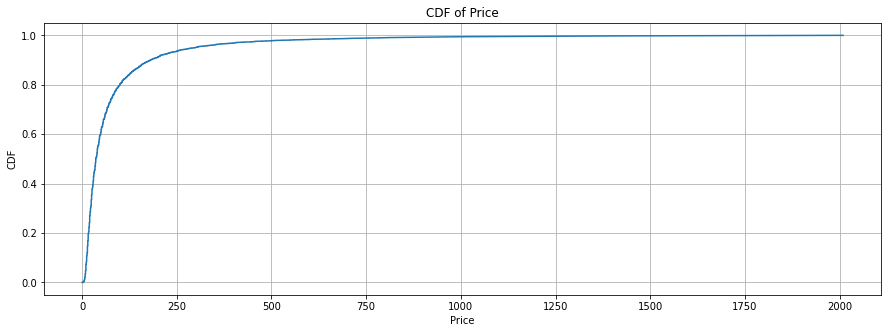

In [ ]:
plt.figure(figsize=(15,5))
plt.title('CDF of Price')
plt.grid()
plt.ylabel('CDF')
plt.xlabel('Price')

sorted_price = sorted(train_df["price"])
normalized_price = sorted_price/train_df["price"].values.sum()
cdf = np.cumsum(normalized_price)
plt.plot(sorted_price, cdf)
plt.show()

# We can plot using sns.kdeplot() too:
# sns.kdeplot(train_df["price"], cumulative=True)

### <h3>3.2.3 Percentiles:</h3>

In [ ]:
x = PrettyTable()
x.field_names = ["Percentile", "Price"]

for i in range(95,101,1):
    x.add_row([i,np.round(np.percentile(train_df["price"],i), 3)])
print(x)

+------------+--------+
| Percentile | Price  |
+------------+--------+
|     95     |  75.0  |
|     96     |  85.0  |
|     97     |  99.0  |
|     98     | 122.0  |
|     99     | 170.0  |
|    100     | 2009.0 |
+------------+--------+


In [ ]:
# Zooming further:

x = PrettyTable()
x.field_names = ["Percentile", "Price"]

for i in np.arange(99,100.1,0.1).round(1):
    x.add_row([i,np.round(np.percentile(train_df["price"],i), 3)])
print(x)

+------------+---------+
| Percentile |  Price  |
+------------+---------+
|    99.0    |  170.0  |
|    99.1    |  180.0  |
|    99.2    |  189.0  |
|    99.3    |  200.0  |
|    99.4    |  210.0  |
|    99.5    | 230.575 |
|    99.6    |  256.0  |
|    99.7    |  286.0  |
|    99.8    |  340.0  |
|    99.9    |  450.0  |
|   100.0    |  2009.0 |
+------------+---------+


In [ ]:
train_df[train_df["price"]==2009.0]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
760469,760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ..."


**Observations:**

1. Mean value of Price: 26.73 USD.
2. Median value of Price: 17 USD.
3. 99 % of all the prices are below 170 USD, 99.9 % of all the data points have price less than 450 USD.
4. Max  value of Price: 2009 USD.


### <h3>3.2.4 Checks to see if we could convert the price values to normal distribution either by taking log or through box-cox transformation: </h3>

**Q-Q plot for checking log(prices) follows normal distribution:**

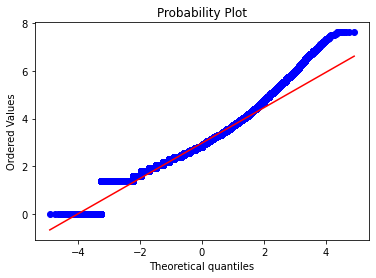

In [ ]:
# +1 to make sure that price is not 0, since log(0) is undefined.
log_price = np.log(train_df['price']+1)

stats.probplot(log_price, dist="norm", plot=plt)
plt.show()

- **From the above Q-Q plot we see that taking log of prices will not convert it to normal distribution. ie: Prices don't follow log-normal distribution.**

**Q-Q plot for checking if box-cox transforming the price follows a  normal distribution:**

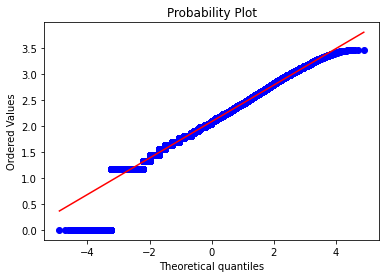

In [ ]:
box_cox_transformations, lmbda = stats.boxcox(train_df['price']+1)

stats.probplot(box_cox_transformations, dist="norm", plot=plt)
plt.show()

- **From the above Q-Q plot we see that box-cox transformation is not able to convert it to normal distribution.**

### <h3>3.2.5 Log(Prices) Distribution:</h3>

**Even though the distribution is not log-normal, taking log of prices reduces the range of values to be predicted:**
- We can train the model to predict log(prices) and optimize for RMSE rather than optimizing for RMSLE directly because many models are well adapted to optimize RMSE than RMSLE. 
- We can then do exp(predicted_prices) to get the final price during inference.

ie;
- y_log = log(y + 1)
- model.fit(X, y_log)
- prediction_log = model.predict(X_test)
- prediction = exp(prediction_log) - 1

<br />

This idea is inspired from the Winners' solution to this problem: https://www.kaggle.com/c/mercari-price-suggestion-challenge/discussion/50256

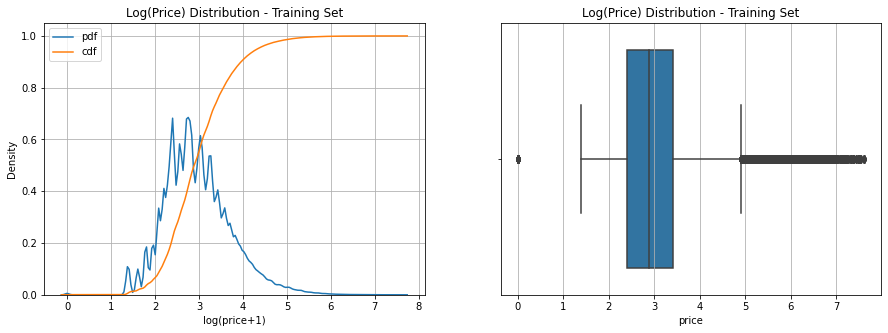



count    1.482486e+06
mean     2.979079e+00
std      7.492085e-01
min      0.000000e+00
25%      2.397895e+00
50%      2.890372e+00
75%      3.401197e+00
max      7.605890e+00
Name: price, dtype: float64


In [ ]:
train_df["log_price"] = log_price

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Log(Price) Distribution - Training Set')
plt.grid()
plt.xlabel('log(price+1)')

sns.kdeplot(log_price, label="pdf")
sns.kdeplot(log_price, cumulative=True, label="cdf")
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Log(Price) Distribution - Training Set')
plt.grid()
plt.xlabel('log(price+1)')

sns.boxplot(x=log_price)

plt.show()

print("\n")
print(log_price.describe())

**Observations:**

After log transformation:
1. Mean value of log(Price): 2.979.
2. Median value of log(Price): 2.890.
3. Max  value of log(Price): 7.60.

## <h2>3.3 item_condition_id:</h2>
The condition of the items provided by the seller. Ranges from 1-5 (New(1) to Poor(5))

### <h3>3.3.1 Distribution of item_condition_id:</h3>

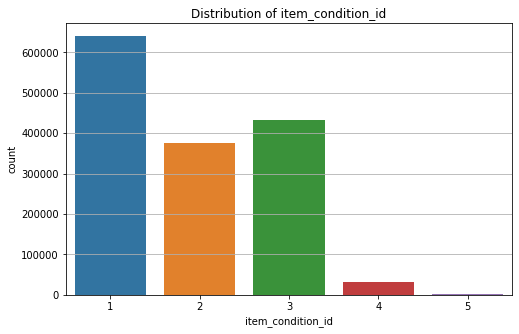

+-------------------+--------+---------+
| item_condition_id | Counts | Percent |
+-------------------+--------+---------+
|         1         | 640501 |   43.2  |
|         3         | 432161 |  29.15  |
|         2         | 375478 |  25.33  |
|         4         |  31962 |   2.16  |
|         5         |   2384 |   0.16  |
+-------------------+--------+---------+


In [ ]:
plt.figure(figsize=(8,5))
plt.title("Distribution of item_condition_id")
plt.grid()

ax = sns.countplot(x=train_df["item_condition_id"])

# for annotating
# for p in ax.patches:
#     ax.annotate('{}({:.2f}%)'.format(p.get_height(), 
#                                      (p.get_height()/len(train_df))*100), 
#                 (p.get_x(), p.get_height()))

plt.show()


x = PrettyTable()

item_condition_ids = train_df["item_condition_id"].value_counts().index.values
x.add_column("item_condition_id", item_condition_ids)

counts = train_df["item_condition_id"].value_counts().values
x.add_column("Counts", counts)
x.align["Counts"] = "r"

percents = ((counts/sum(counts))*100).round(2)
x.add_column("Percent", percents)

print(x)


**Observations:**

1. There are more number of samples for products in good(1) condition and with item_condition_id equal to 2 and 3.
2. Data contains fewer samples with products in bad(5) condition and with item_condition_id equal to 4.

### <h3>3.3.2 Relationship b/w item_condition_id and log_price: </h3> 

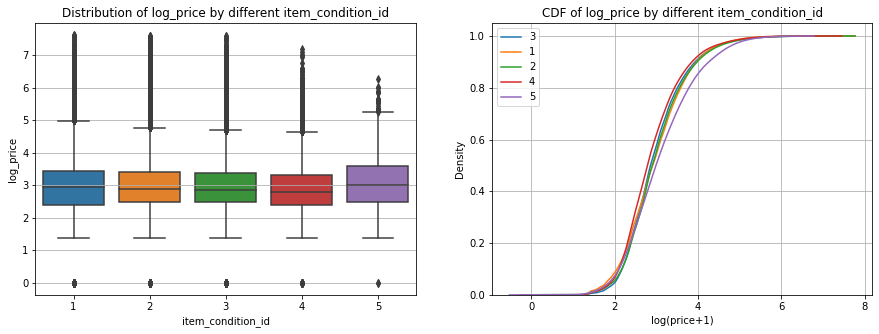

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Distribution of log_price by different item_condition_id')
plt.grid()

sns.boxplot(x=train_df['item_condition_id'], y=train_df["log_price"])

plt.subplot(1,2,2)
plt.title('CDF of log_price by different item_condition_id')
plt.grid()
plt.xlabel('log(price+1)')

for id in train_df['item_condition_id'].unique():
    sns.kdeplot(train_df[train_df['item_condition_id']==id]["log_price"], 
                cumulative=True, label=id)
plt.legend()

plt.show()

**Observations**: 
1. There is not much of difference seen in the prices of products based on item_condition_id alone.
2. Prices of products with item_condition_id=5 seems slightly higher than others, but this cannot be guaranteed as there are very few samples with item_condition_id=5 in the data.

## <h2>3.4 shipping:</h2>
1 if shipping fee is paid by seller and 0 if shipping fee is paid by buyer.

### <h3>3.4.1 Distribution of shipping:</h3>

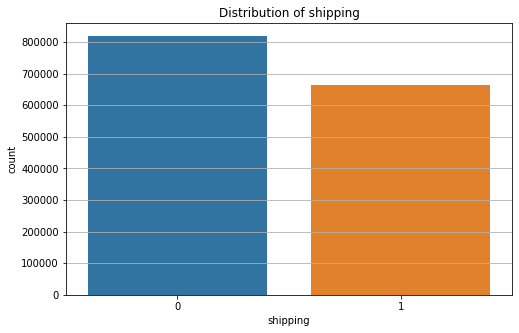

+----------+--------+---------+
| shipping | Counts | Percent |
+----------+--------+---------+
|    0     | 819427 |  55.27  |
|    1     | 663059 |  44.73  |
+----------+--------+---------+


In [ ]:
plt.figure(figsize=(8,5))
plt.title("Distribution of shipping")
plt.grid()

sns.countplot(x=train_df["shipping"])
plt.show()


x = PrettyTable()

shipping_ids = train_df["shipping"].value_counts().index.values
x.add_column("shipping", shipping_ids)

counts = train_df["shipping"].value_counts().values
x.add_column("Counts", counts)
x.align["Counts"] = "r"

percents = ((counts/sum(counts))*100).round(2)
x.add_column("Percent", percents)

print(x)

- **The occurrences of shipping ids corresponding to shipping fee paid by the seller(1) and by the buyer(0) are almost equal in the data.**

### <h3>3.4.2 Relationship b/w shipping_id and log_price:</h3>

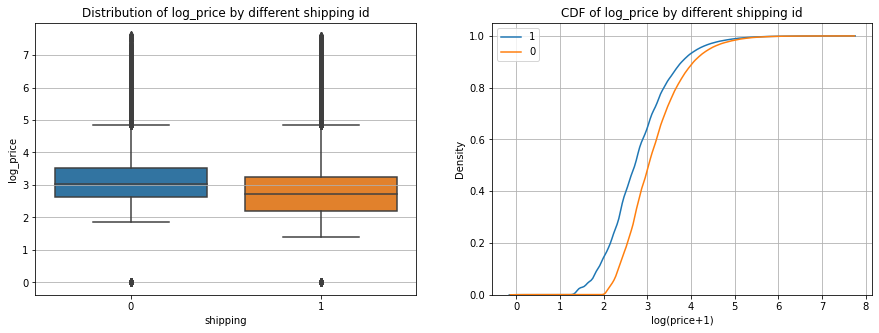

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Distribution of log_price by different shipping id')
plt.grid()

sns.boxplot(x=train_df['shipping'], y=train_df["log_price"])

plt.subplot(1,2,2)
plt.title('CDF of log_price by different shipping id')
plt.grid()
plt.xlabel('log(price+1)')

for id in train_df['shipping'].unique():
    sns.kdeplot(train_df[train_df['shipping']==id]["log_price"], 
                cumulative=True, label=id)
plt.legend()

plt.show()

### <h3>3.4.3 Difference b/w mean and median log_price for each shipping_id:</h3>

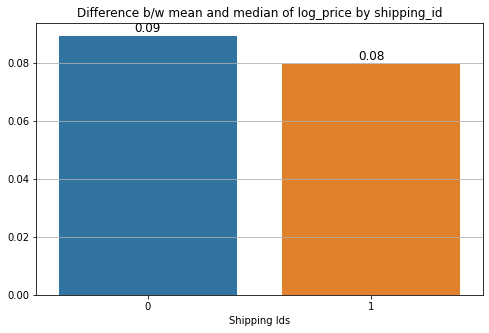

In [ ]:
x = train_df["shipping"].unique()
y_means = np.array(
    [train_df[train_df["shipping"]==x[0]]["log_price"].mean(), 
    train_df[train_df["shipping"]==x[1]]["log_price"].mean()])
y_medians = np.array(
    [train_df[train_df["shipping"]==x[0]]["log_price"].median(),
    train_df[train_df["shipping"]==x[1]]["log_price"].median()])
y = np.abs(y_means - y_medians)

plt.figure(figsize=(8,5))
plt.title('Difference b/w mean and median of log_price by shipping_id')
plt.grid()
plt.xlabel('Shipping Ids')

ax = sns.barplot(x=x, y=y)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=12, xytext=(0, 8),
                textcoords='offset points')

plt.show()

**Observations**: 
1. Prices of products with shipping_id=0(shipping fee is paid by buyer) seems to be higher than products with shipping_id=1(shipping fee is paid by the seller).
2. The difference between mean and median prices being less indicates prices being less skewed for each of the shipping ids.

## <h2>3.5 category_name:</h2>
category of the listing.
<br/>
category_name is hierarchical as shown below with 3 levels of category.

In [ ]:
train_df["category_name"].head()

0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
Name: category_name, dtype: object

In [ ]:
print("Unique Categories: ",train_df["category_name"].nunique())

Unique Categories:  1287


In [ ]:
null_values = train_df["category_name"].isnull().sum()
print("Items with no category_name: " + 
      str(null_values) + 
      "("+str(round((null_values/len(train_df))*100, 2))+"%)")

Items with no category_name: 6327(0.43%)


### <h3>3.5.1 Difference in log_price based on category_name:</h3>

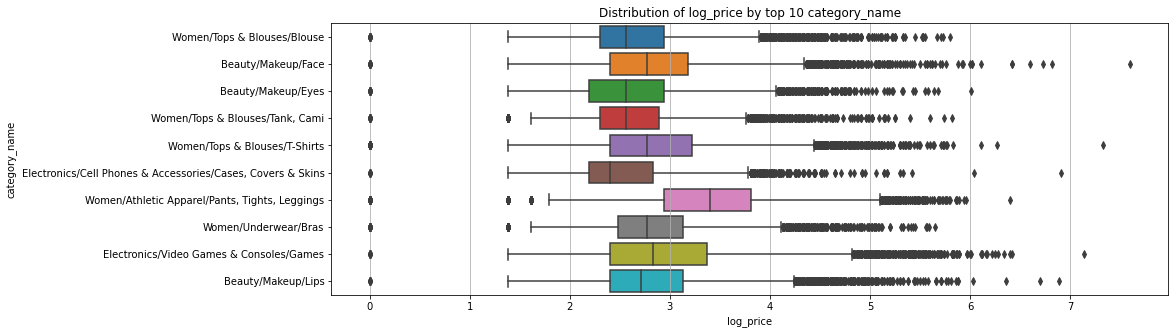

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of log_price by top 10 category_name')
plt.grid()

top_10s = train_df[train_df["category_name"].isin(
    train_df["category_name"].value_counts().index.values[:10])]

sns.boxplot(x="log_price", y='category_name', data=top_10s, orient="h")

plt.show()

### <h3>3.5.2 Splitting category_name into multiple levels(main_cat/subcat_1/subcat_2):</h3>

In [ ]:
def split_cat(category_name):
    if isinstance(category_name, str):
        return category_name.split("/")
    else:
        return ["no_main_cat", "no_subcat_1", "no_subcat_2"]

train_df["main_cat"], train_df["subcat_1"], train_df["subcat_2"] = zip(
    *train_df["category_name"].apply(split_cat))

#### <h4>3.5.2.1 main_category:</h4>

In [ ]:
print("Main Categories: ",train_df["main_cat"].nunique())

Main Categories:  11


##### <h4> Distribution of main category:</h4>

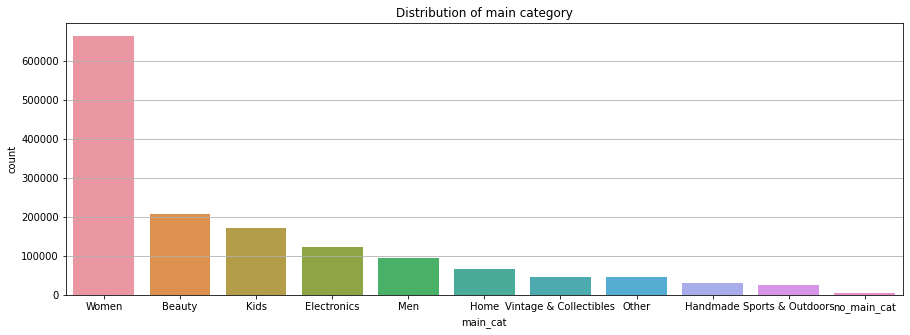

+------------------------+--------+---------+
|        main_cat        | Counts | Percent |
+------------------------+--------+---------+
|         Women          | 664380 |  44.82  |
|         Beauty         | 207813 |  14.02  |
|          Kids          | 171688 |  11.58  |
|      Electronics       | 122683 |   8.28  |
|          Men           |  93677 |   6.32  |
|          Home          |  67870 |   4.58  |
| Vintage & Collectibles |  46530 |   3.14  |
|         Other          |  45337 |   3.06  |
|        Handmade        |  30839 |   2.08  |
|   Sports & Outdoors    |  25342 |   1.71  |
|      no_main_cat       |   6327 |   0.43  |
+------------------------+--------+---------+


In [ ]:
plt.figure(figsize=(15,5))
plt.title("Distribution of main category")
plt.grid()

sns.countplot(x=train_df["main_cat"], 
              order = train_df["main_cat"].value_counts().index)

plt.show()


x = PrettyTable()

main_categories = train_df["main_cat"].value_counts().index.values
x.add_column("main_cat", main_categories)

counts = train_df["main_cat"].value_counts().values
x.add_column("Counts", counts)
x.align["Counts"] = "r"

percents = ((counts/sum(counts))*100).round(2)
x.add_column("Percent", percents)

print(x)

- **Most of the products belong to Women's category ie; 44.8% of the whole dataset.**

##### <h4> Distribution of log_price by main category:</h4>

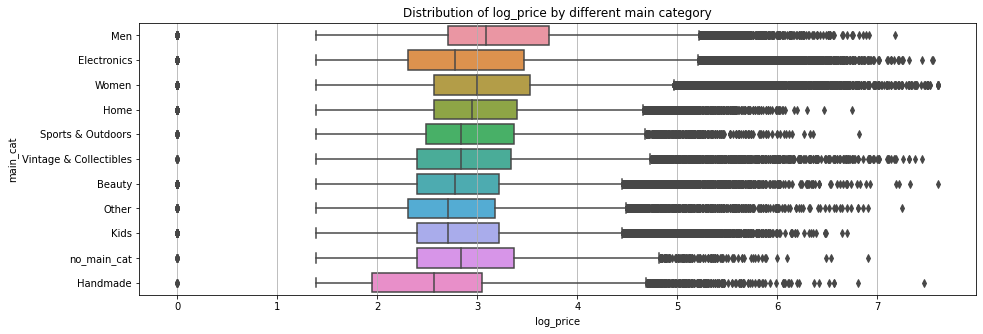

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of log_price by different main category')
plt.grid()

sns.boxplot(x=train_df["log_price"], y=train_df['main_cat'], orient="h")

plt.show()

##### <h4> Difference b/w mean and median of log_price  by main category:</h4>

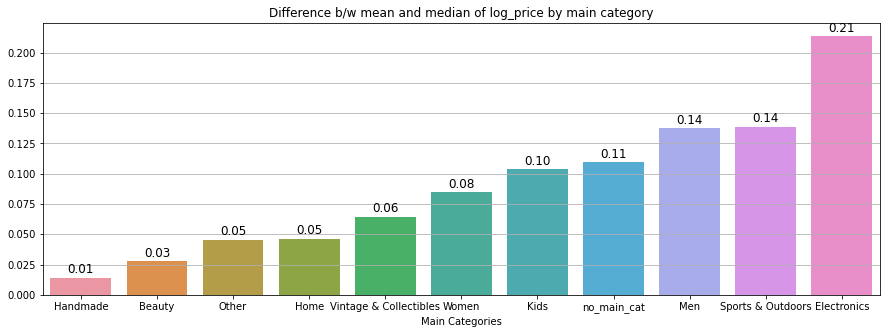

In [ ]:
x = train_df["main_cat"].unique()

y_means = []
y_medians = []
for cat in x:
    y_means.append(train_df[train_df["main_cat"]==cat]["log_price"].mean())
    y_medians.append(train_df[train_df["main_cat"]==cat]["log_price"].median())
y = np.abs(np.array(y_means) - np.array(y_medians))
indices = np.argsort(y)

plt.figure(figsize=(15,5))
plt.title('Difference b/w mean and median of log_price by main category')
plt.grid()
plt.xlabel('Main Categories')

ax = sns.barplot(x=x[indices], y=y[indices])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=12, xytext=(0, 8),
                textcoords='offset points')

plt.show()

**Observations**:
1. The above plots shows mean log_price of products belonging to Men's category being the highest and mean log_price of products belonging to Handmade category being the lowest. 
2. Women's category has more number of samples compared to other categories.
3. Even though there is difference between mean and median log_price for few main categories the magnitude is smaller, hence it doesn't indicates that the log_price for those categories have few extreme values(significant higher or lower values compared to median). But checking the same for subcategories in the hierarchy could reveal some more insights.

#### <h4>3.5.2.2 subcat_1:</h4>

In [ ]:
print("subcat_1 unique categories: ",train_df["subcat_1"].nunique())

print("\nTop 10 subcat_1:")

x = PrettyTable()

main_categories = train_df["subcat_1"].value_counts().index.values[:10]
x.add_column("subcat_1", main_categories)

counts = train_df["subcat_1"].value_counts().values[:10]
x.add_column("Counts", counts)
x.align["Counts"] = "r"

percents = ((counts/train_df.shape[0])*100).round(2)
x.add_column("Percent", percents)

print(x)

subcat_1 unique categories:  114

Top 10 subcat_1:
+---------------------------+--------+---------+
|          subcat_1         | Counts | Percent |
+---------------------------+--------+---------+
|      Athletic Apparel     | 134382 |   9.06  |
|           Makeup          | 124613 |   8.41  |
|       Tops & Blouses      | 106959 |   7.21  |
|           Shoes           | 100452 |   6.78  |
|          Jewelry          |  61761 |   4.17  |
|            Toys           |  58156 |   3.92  |
| Cell Phones & Accessories |  53283 |   3.59  |
|      Women's Handbags     |  45862 |   3.09  |
|          Dresses          |  45758 |   3.09  |
|    Women's Accessories    |  42350 |   2.86  |
+---------------------------+--------+---------+


#### <h4>3.5.2.3 subcat_2:</h4>

In [ ]:
print("subcat_2 unique categories: ",train_df["subcat_2"].nunique())

print("\nTop 10 subcat_2:")

x = PrettyTable()

main_categories = train_df["subcat_2"].value_counts().index.values[:10]
x.add_column("subcat_2", main_categories)

counts = train_df["subcat_2"].value_counts().values[:10]
x.add_column("Counts", counts)
x.align["Counts"] = "r"

percents = ((counts/train_df.shape[0])*100).round(2)
x.add_column("Percent", percents)

print(x)

subcat_2 unique categories:  871

Top 10 subcat_2:
+-------------------------+--------+---------+
|         subcat_2        | Counts | Percent |
+-------------------------+--------+---------+
| Pants, Tights, Leggings |  60176 |   4.06  |
|          Other          |  50222 |   3.39  |
|           Face          |  50166 |   3.38  |
|         T-Shirts        |  46380 |   3.13  |
|          Shoes          |  32168 |   2.17  |
|          Games          |  30906 |   2.08  |
|           Lips          |  30869 |   2.08  |
|         Athletic        |  27059 |   1.83  |
|           Eyes          |  26034 |   1.76  |
|  Cases, Covers & Skins  |  24675 |   1.66  |
+-------------------------+--------+---------+


- **The top occurring subcategories corresponds to some kind of Apparels and Beauty products.**

## <h2> 3.6 name:</h2>
The title of the product listing.

### <h3>3.6.1 Distribution of number of characters in item name:</h3>

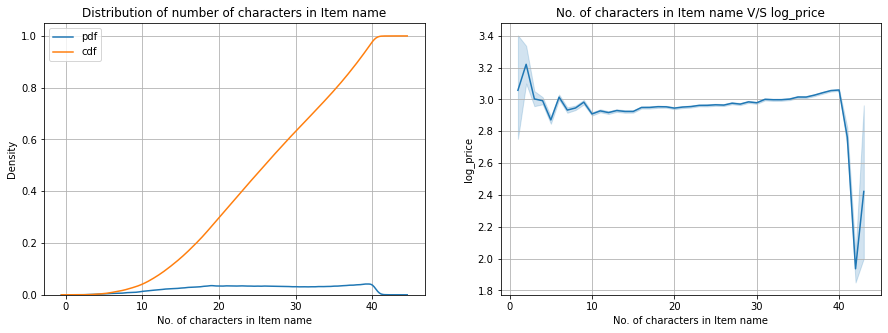



count    1.482486e+06
mean     2.578628e+01
std      9.164530e+00
min      1.000000e+00
25%      1.900000e+01
50%      2.600000e+01
75%      3.400000e+01
max      4.300000e+01
Name: name_char_count, dtype: float64


In [ ]:
train_df["name_char_count"] = train_df["name"].apply(len)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of number of characters in Item name')
plt.grid()
plt.xlabel('No. of characters in Item name')

sns.kdeplot(train_df["name_char_count"], label="pdf")
sns.kdeplot(train_df["name_char_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title('No. of characters in Item name V/S log_price')
plt.grid()
plt.xlabel('No. of characters in Item name')

sns.lineplot(x=train_df["name_char_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["name_char_count"].describe())

### <h3>3.6.2 Distribution of number of words in item name:</h3>
Tokenizing the strings using nltk word_tokenize.

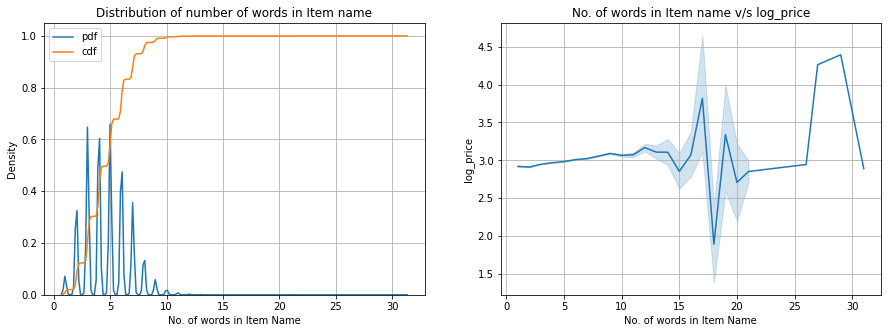



count    1.482486e+06
mean     4.653854e+00
std      1.877433e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      3.100000e+01
Name: name_word_count, dtype: float64


In [ ]:
# Tokenizing the strings using nltk word_tokenize.
train_df["name_word_count"] = train_df["name"].apply(
    lambda x: len(word_tokenize(x)))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of number of words in Item name')
plt.grid()
plt.xlabel('No. of words in Item Name')

sns.kdeplot(train_df["name_word_count"], label="pdf")
sns.kdeplot(train_df["name_word_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title('No. of words in Item name v/s log_price')
plt.grid()
plt.xlabel('No. of words in Item Name')

sns.lineplot(x=train_df["name_word_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["name_word_count"].describe())

### <h3>3.6.3 Preprocessing Item Name:</h3>

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"cannot", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
STOP_WORDS = set(stopwords.words("english"))
STOP_WORDS = STOP_WORDS - {'no', 'nor', 'not'}
# let's add "br" because after removing html tags such as "<br />" using 
# beatiful soup we may still be left with "br".
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step
STOP_WORDS.update("br")

# initialize stemmer
stemmer = SnowballStemmer("english")

# We could try to retain any info from a number present in the text 
# without removing it as it could hold some info. 
# Ex: no. of items being sold as a bundle etc. 

# let's keep ? and ! marks in the item name without removing them, since it 
# could mean seller was trying to convey something in a different way to grab 
# the buyer's attention and it could have had a first impression on the buyer 
# when the name was read. 
def preprocess_item_name(txt):
    sent = re.sub(r"http\S+", "", txt)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = sent.replace("′", "'").replace("’", "'")
    sent = str(sent).lower()
    sent = decontracted(sent)
    sent = re.sub('[^A-Za-z0-9_\!\?]+', ' ', sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('\\"', ' ')
    # sent = ' '.join(stemmer.stem(e) for e in sent.split() if e not in STOP_WORDS)
    sent = " ".join(stemmer.stem(e) for e in sent.split())
    sent = sent.strip()
    return sent

### <h3>3.6.4 Distribution of number of words in preprocessed item name:</h3>

In [ ]:
# # preprocess item name:
# train_df["preproc_name"] = train_df["name"].apply(preprocess_item_name)
# train_df["preproc_name_word_count"] = train_df["preproc_name"].apply(
#                                                   lambda x: len(x.split()))
# train_df["preproc_name_word_count"].value_counts()

- **The data in "name" column is the one with short info of the product and visible to the buyers easily. Removing stopwords has resulted in word count being 0 for 266 samples. Hence retaining stopwords for name column.**

In [ ]:
# preprocess item name without removing stop words:
train_df["preproc_name"] = train_df["name"].apply(preprocess_item_name)
train_df["preproc_name_word_count"] = train_df["preproc_name"].apply(
                                                    lambda x: len(x.split()))
train_df["preproc_name_word_count"].value_counts()

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


4     301698
5     287305
3     274598
6     239274
2     153211
7     135614
8      47317
1      30510
9      10830
10      1805
11       258
12        35
0         19
13        11
17         1
Name: preproc_name_word_count, dtype: int64

- **There are 19 samples with 0 word count after prerpocessing without removing stop words.**

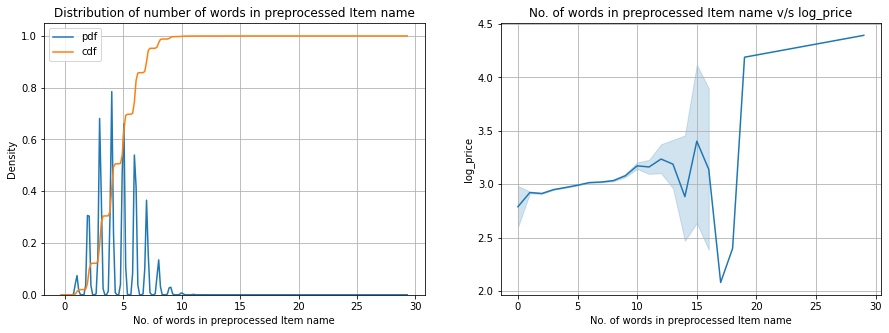



count    1.482486e+06
mean     4.554826e+00
std      1.748022e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      2.900000e+01
Name: preproc_name_word_count, dtype: float64


In [ ]:
train_df["preproc_name_word_count"] = train_df["preproc_name"].apply(
                                            lambda x: len(word_tokenize(x)))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of number of words in preprocessed Item name')
plt.grid()
plt.xlabel('No. of words in preprocessed Item name')

sns.kdeplot(train_df["preproc_name_word_count"], label="pdf")
sns.kdeplot(train_df["preproc_name_word_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title('No. of words in preprocessed Item name v/s log_price')
plt.grid()
plt.xlabel('No. of words in preprocessed Item name')

sns.lineplot(x=train_df["preproc_name_word_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["preproc_name_word_count"].describe())

### <h3>3.6.5 Distribution of number of characters in preprocessed item name:</h3>

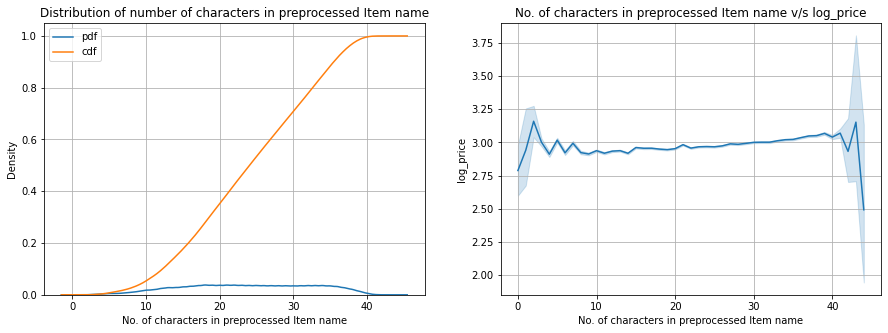



count    1.482486e+06
mean     2.396150e+01
std      8.638251e+00
min      0.000000e+00
25%      1.700000e+01
50%      2.400000e+01
75%      3.100000e+01
max      4.400000e+01
Name: preproc_name_char_count, dtype: float64


In [ ]:
train_df["preproc_name_char_count"] = train_df["preproc_name"].apply(len)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of number of characters in preprocessed Item name')
plt.grid()
plt.xlabel('No. of characters in preprocessed Item name')

sns.kdeplot(train_df["preproc_name_char_count"], label="pdf")
sns.kdeplot(train_df["preproc_name_char_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title('No. of characters in preprocessed Item name v/s log_price')
plt.grid()
plt.xlabel('No. of characters in preprocessed Item name')

sns.lineplot(x=train_df["preproc_name_char_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["preproc_name_char_count"].describe())

**Observations**:
1. Distribution of item name length before and after preprocessing is similar. Its relation with item log_price before and after preprocessing is also similar.
2. Distribution of number of words in item name before and after preprocessing have slightly different relation with log_price.

### <h3>3.6.6 WordCloud of words in item name:</h3>

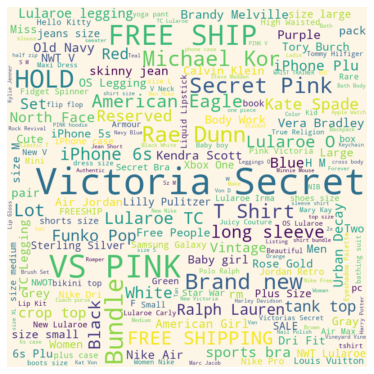

In [ ]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
wc = WordCloud(width = 800, height = 800, background_color='oldlace',
                stopwords = STOPWORDS, min_font_size = 10)
wc.generate(" ".join(train_df["name"].values.ravel())) 
  
# plot the WordCloud image
plt.figure(figsize=(8,5), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

- **Some of the item names also contain brand names in them.**

Ex: American Eagle, Iphone, Victoria Secret. etc

## <h2>3.7 item_description:</h2>
Full description of the item.
<br/>
There are 4 samples with no descriptions as seen earlier. 

### <h3>3.7.1 Distribution of log of number of characters in item description:</h3>

- **Filling with empty string "" for samples with no description.**

In [ ]:
train_df["item_description"] = train_df["item_description"].fillna("")

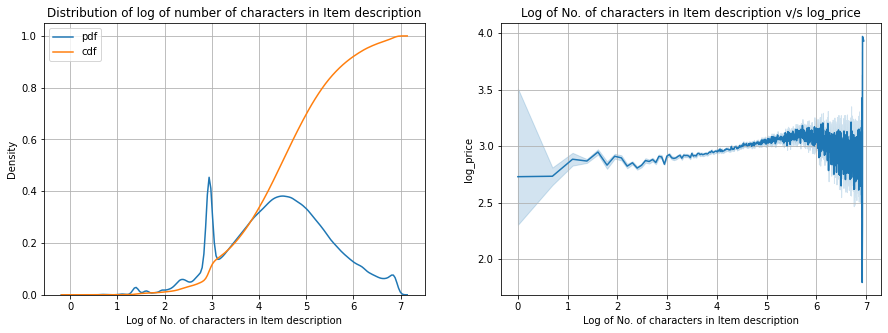



count    1.482486e+06
mean     4.436950e+00
std      1.077362e+00
min      0.000000e+00
25%      3.713572e+00
50%      4.465908e+00
75%      5.164786e+00
max      6.953684e+00
Name: log_item_desc_char_count, dtype: float64


In [ ]:
train_df["log_item_desc_char_count"] = train_df["item_description"].apply(
                                                    lambda x: np.log(len(x)+1))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of log of number of characters in Item description')
plt.grid()
plt.xlabel('Log of No. of characters in Item description')

sns.kdeplot(train_df["log_item_desc_char_count"], label="pdf")
sns.kdeplot(train_df["log_item_desc_char_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Log of No. of characters in Item description v/s log_price')
plt.grid()
plt.xlabel('Log of No. of characters in Item description')

sns.lineplot(x=train_df["log_item_desc_char_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["log_item_desc_char_count"].describe())

### <h3>3.7.2 Distribution of Log of number of words in item description:</h3>
Tokenizing the strings using nltk sent_tokenize and word_tokenize.

In [ ]:
def tokenize(txt):
    tokens = []
    for s in sent_tokenize(txt):
        tokens.extend(word_tokenize(s))
    return tokens

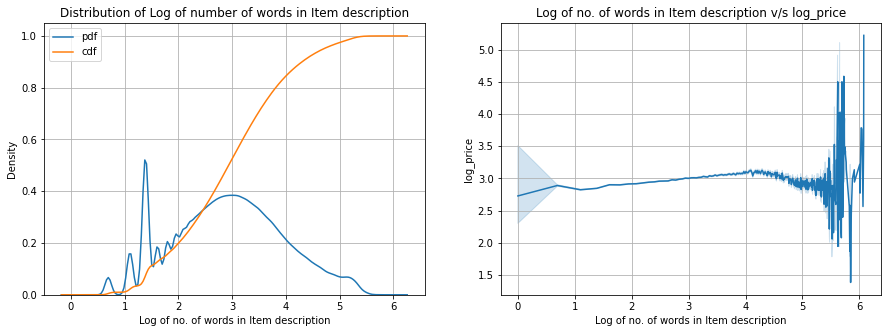



count    1.482486e+06
mean     2.930808e+00
std      1.021611e+00
min      0.000000e+00
25%      2.197225e+00
50%      2.944439e+00
75%      3.637586e+00
max      6.077642e+00
Name: log_item_desc_word_count, dtype: float64


In [ ]:
# Tokenizing the strings using nltk sent_tokenize and word_tokenize.
train_df["log_item_desc_word_count"] = train_df["item_description"].apply(
                                        lambda x: np.log(len(tokenize(x))+1))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of Log of number of words in Item description')
plt.grid()
plt.xlabel('Log of no. of words in Item description')

sns.kdeplot(train_df["log_item_desc_word_count"], label="pdf")
sns.kdeplot(train_df["log_item_desc_word_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Log of no. of words in Item description v/s log_price')
plt.grid()
plt.xlabel('Log of no. of words in Item description')

sns.lineplot(x=train_df["log_item_desc_word_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["log_item_desc_word_count"].describe())

### <h3>3.7.3 Preprocessing Item description:</h3>

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"cannot", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
STOP_WORDS = set(stopwords.words("english"))
STOP_WORDS = STOP_WORDS - {'no', 'nor', 'not'}
# let's add "br" because after removing html tags such as "<br />" using 
# beatiful soup we may still be left with "br".
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step
STOP_WORDS.update("br")

# initialize stemmer
stemmer = SnowballStemmer("english")

# We could try to retain any info from a number present in the text 
# without removing it as it could hold some info. 
# Ex: no. of items being sold as a bundle etc. 

# let's keep ? and ! marks in the item desc without removing them, since it 
# could mean seller was trying to convey something in a different way to grab 
# the buyer's attention and it could have had a first impression on the buyer 
# when the desc was read. 
def preprocess_item_desc(txt):
    sent = re.sub(r"http\S+", "", txt)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = sent.replace("′", "'").replace("’", "'")
    sent = str(sent).lower()
    sent = decontracted(sent)
    sent = re.sub('[^A-Za-z0-9_\!\?]+', ' ', sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('\\"', ' ')
    sent = ' '.join(
        stemmer.stem(e) for e in sent.split() if e not in STOP_WORDS)
    # sent = " ".join(stemmer.stem(e) for e in sent.split())
    sent = sent.strip()
    return sent

In [ ]:
# preprocess item description:
train_df["preproc_desc"] = train_df["item_description"].apply(
                                                        preprocess_item_desc)
train_df["preproc_desc_word_count"] = train_df["preproc_desc"].apply(
                                                    lambda x: len(x.split()))
train_df["preproc_desc_word_count"].value_counts()

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


3      132799
6       70725
7       69404
4       69073
5       67921
        ...  
190         1
178         1
243         1
199         1
191         1
Name: preproc_desc_word_count, Length: 193, dtype: int64

In [ ]:
train_df.loc[train_df["preproc_desc_word_count"]==0]["item_description"]

2730         .
3552         ❤
9404         .
9979        :)
10429       :)
          ... 
1469887     :)
1475391      .
1477678    :))
1477890      .
1482393     :)
Name: item_description, Length: 684, dtype: object

- **There are 680 samples with 0 word count after prerpocessing.**

### <h3>3.7.4 Distribution log of number of words in preprocessed item description:</h3>

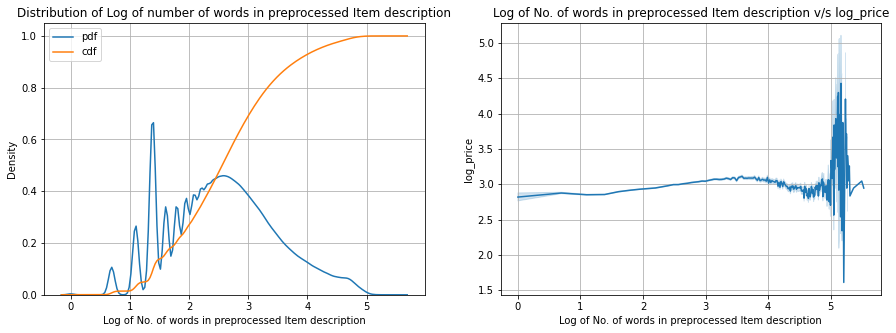



count    1.482486e+06
mean     2.584299e+00
std      8.908443e-01
min      0.000000e+00
25%      1.945910e+00
50%      2.564949e+00
75%      3.178054e+00
max      5.529429e+00
Name: log_preproc_desc_word_count, dtype: float64


In [ ]:
train_df["log_preproc_desc_word_count"] = train_df["preproc_desc"].apply(
                                    lambda x: np.log(len(word_tokenize(x))+1))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of Log of number of words in preprocessed Item description')
plt.grid()
plt.xlabel('Log of No. of words in preprocessed Item description')

sns.kdeplot(train_df["log_preproc_desc_word_count"], label="pdf")
sns.kdeplot(train_df["log_preproc_desc_word_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Log of No. of words in preprocessed Item description v/s log_price')
plt.grid()
plt.xlabel('Log of No. of words in preprocessed Item description')

sns.lineplot(x=train_df["log_preproc_desc_word_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["log_preproc_desc_word_count"].describe())

### <h3>3.7.5 Distribution of log number of characters in preprocessed item description:</h3>

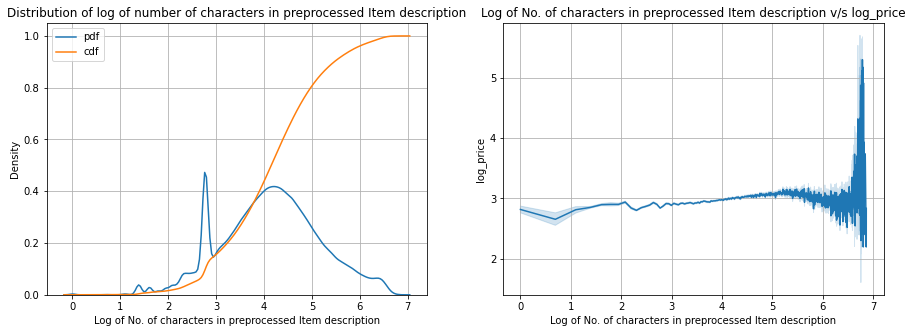



count    1.482486e+06
mean     4.132227e+00
std      1.017414e+00
min      0.000000e+00
25%      3.433987e+00
50%      4.158883e+00
75%      4.804021e+00
max      6.864848e+00
Name: log_preproc_desc_char_count, dtype: float64


In [ ]:
train_df["log_preproc_desc_char_count"] = train_df["preproc_desc"].apply(
                                                    lambda x: np.log(len(x)+1))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title(
'Distribution of log of number of characters in preprocessed Item description')
plt.grid()
plt.xlabel('Log of No. of characters in preprocessed Item description')

sns.kdeplot(train_df["log_preproc_desc_char_count"], label="pdf")
sns.kdeplot(
    train_df["log_preproc_desc_char_count"], cumulative=True, label="cdf")
plt.legend()


plt.subplot(1, 2, 2)
plt.title(
    'Log of No. of characters in preprocessed Item description v/s log_price')
plt.grid()
plt.xlabel('Log of No. of characters in preprocessed Item description')

sns.lineplot(x=train_df["log_preproc_desc_char_count"], y=train_df["log_price"])

plt.show()

print("\n")
print(train_df["log_preproc_desc_char_count"].describe())

**Observations:**
1. Relationship of item description length and word count with log_price is similar.
2. Higher priced items tend to have longer item descriptions but the inverse is not true (ie; not all items with longer descriptions have higher price).

### <h3>3.7.6 WordCloud of words in item description:</h3>

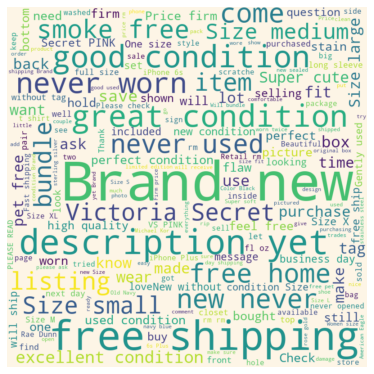

In [ ]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

wc = WordCloud(width = 800, height = 800, background_color='oldlace', 
               stopwords = STOPWORDS, min_font_size = 10)
wc.generate(" ".join(train_df["item_description"].values.ravel()))

# plot the WordCloud image
plt.figure(figsize=(8,5), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
train_df["item_description"] = train_df["item_description"].map(
    lambda x: x.lower())
print("Number of samples with descriptions which say 'no description yet': ", \
      train_df[train_df["item_description"] == "no description yet"].shape[0])

Number of samples with descriptions which say 'no description yet':  82494


**Observations:**
- There are many words such as "Brand new", "free shipping" etc that could be used to attract customers.
- From the above we see that there are 82494 descriptions which say "no description yet". This is equivalent to having no description and can be imputed with necessary missing value imputation chosen.


## <h2>3.8 brand_name:</h2>
brand name of the product.


In [ ]:
train_df["brand_name"].head()

0       NaN
1     Razer
2    Target
3       NaN
4       NaN
Name: brand_name, dtype: object

In [ ]:
null_values = train_df["brand_name"].isnull().sum()
print("Items with no brand_name: " + 
      str(null_values) + 
      "("+str(round((null_values/len(train_df))*100, 2))+"%)")

Items with no brand_name: 632641(42.67%)


- **Filling "no_brand_name" for samples with no brand name.**

In [ ]:
train_df["brand_name"].fillna("no_brand_name", inplace=True)

### <h3>Preprocess brand_name:</h3>

In [ ]:
def preprocess_brand_name(txt):
    # remove html tags
    sent = re.sub(r"http\S+", "", txt)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = sent.replace("′", "'").replace("’", "'")
    # lower text
    sent = str(sent).lower()
    sent = re.sub('[^A-Za-z0-9_\-]+', ' ', sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\n', ' ')
    sent = ' '.join(word for word in sent.split())
    sent = sent.strip()
    return sent

train_df["preproc_brand_name"] = train_df["brand_name"].apply(preprocess_brand_name)

In [ ]:
print("Unique Brands: ",train_df["preproc_brand_name"].nunique())

Unique Brands:  4803


**Observations**:
1. There are around 4803 unique brand names in the data and 42.67% of the whole data has no brand_names.
2. But there were brand names mentioned in item's name. Thus we could either combine all "name" and "brand_name" columns together as one text column or we could use the "name" column to impute some of the known values to the "brand_name" column.<br/> 
But it is necessary to note that some of the words in the "name" could be picked up as brand names even when they are not.<br/>
Ex: PINK (brand name) but when this is made case insensitive then it would mean it is same as the word "pink" that could be in item name or description to indicate the color of the product.

### <h3>3.8.1 Most occurring and least occurring brand names:</h3>

In [ ]:
print("\nTop 10 brand names in the data:")

x = PrettyTable()

top_10_brands = train_df["preproc_brand_name"].value_counts().index.values[:10]
x.add_column("Brand Names", top_10_brands)

counts = train_df["preproc_brand_name"].value_counts().values[:10]
x.add_column("Counts", counts)
x.align["Counts"] = "r"

percents = ((counts/train_df.shape[0])*100).round(2)
x.add_column("Percent", percents)

print(x)


Top 10 brand names in the data:
+-------------------+--------+---------+
|    Brand Names    | Counts | Percent |
+-------------------+--------+---------+
|   no_brand_name   | 632641 |  42.67  |
|        pink       |  54088 |   3.65  |
|        nike       |  54043 |   3.65  |
| victoria s secret |  48035 |   3.24  |
|      lularoe      |  31024 |   2.09  |
|       apple       |  17322 |   1.17  |
|     forever 21    |  15186 |   1.02  |
|      nintendo     |  15007 |   1.01  |
|     lululemon     |  14558 |   0.98  |
|    michael kors   |  13928 |   0.94  |
+-------------------+--------+---------+


In [ ]:
print("\nLeast occurring 10 brand names in the data:")

x = PrettyTable()

bottom_10_brands = train_df["preproc_brand_name"].value_counts().index.values[-10:]
x.add_column("Brand Names", bottom_10_brands)

counts = train_df["preproc_brand_name"].value_counts().values[-10:]
x.add_column("Counts", counts)
x.align["Counts"] = "r"

percents = ((counts/train_df.shape[0])*100).round(4)
x.add_column("Percent", percents)

print(x)


Least occurring 10 brand names in the data:
+----------------------------+--------+---------+
|        Brand Names         | Counts | Percent |
+----------------------------+--------+---------+
| belle by sigerson morrison |      1 |  0.0001 |
|       madison leigh        |      1 |  0.0001 |
|      the wish factory      |      1 |  0.0001 |
|           heinz            |      1 |  0.0001 |
|           virgo            |      1 |  0.0001 |
|            zoot            |      1 |  0.0001 |
|           sejour           |      1 |  0.0001 |
|          blue box          |      1 |  0.0001 |
|    gm performance parts    |      1 |  0.0001 |
|         kids only          |      1 |  0.0001 |
+----------------------------+--------+---------+


**Observations**:
1. There are some brands that occur just one time in the whole data.
2. We could include the "count" info of brand names.This could represent popularity of brands among all the sold items.  

### <h3>3.8.2 Distribution of Log(Price) for each of the top 10 brand_names:</h3>

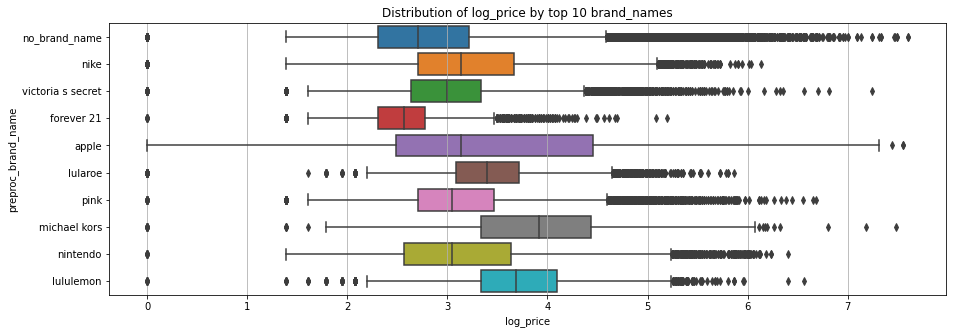

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of log_price by top 10 brand_names')
plt.grid()

top_10s = train_df[train_df["preproc_brand_name"].isin(top_10_brands)]
sns.boxplot(x="log_price", y='preproc_brand_name', data=top_10s, orient="h")

plt.show()

- **There is a significant difference in the prices based on brand names.**

### <h3>3.8.3 Distribution of the count of  brand_names in the data:</h3> 

In [ ]:
brand_counts = train_df["preproc_brand_name"].value_counts()

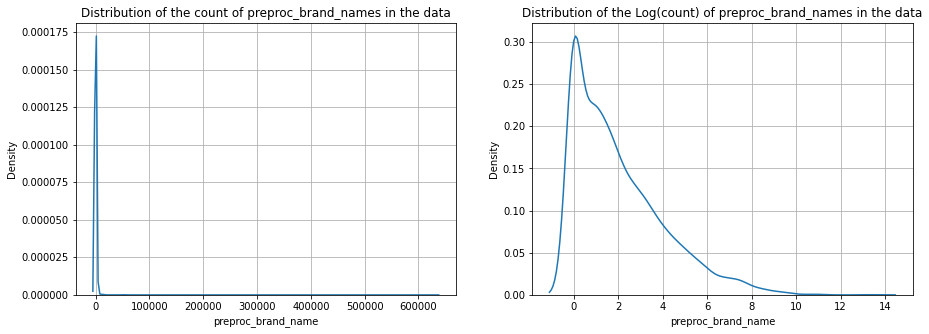

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Distribution of the count of preproc_brand_names in the data")
plt.grid()

sns.kdeplot(brand_counts)


plt.subplot(1, 2, 2)
plt.title("Distribution of the Log(count) of preproc_brand_names in the data")
plt.grid()

sns.kdeplot(np.log(brand_counts))

plt.show()

In [ ]:
x = PrettyTable()
x.field_names = ["Percentile", "Brand_Counts"]

for i in range(0, 50,10):
    x.add_row([i,np.round(np.percentile(brand_counts,i), 3)])
print(x)

+------------+--------------+
| Percentile | Brand_Counts |
+------------+--------------+
|     0      |     1.0      |
|     10     |     1.0      |
|     20     |     1.0      |
|     30     |     2.0      |
|     40     |     3.0      |
+------------+--------------+


- **Majority of the brands occur only once and few number of times. This also means that there is very less information about majority of the brands in the data.**

## <h2>3.9 Check for items with prices equal to or less than 0:</h2>

In [ ]:
print("No. of items with price < 0: ", train_df[train_df["price"]<0].shape[0])
print("No. of items with price = 0: ", train_df[train_df["price"]==0].shape[0])

No. of items with price < 0:  0
No. of items with price = 0:  874


- **There are 874 items listed with price=0.**

In [ ]:
zero_priced_items = train_df[train_df["price"]==0]
zero_priced_items

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,main_cat,...,preproc_name,preproc_name_word_count,preproc_name_char_count,log_item_desc_char_count,log_item_desc_word_count,preproc_desc,preproc_desc_word_count,log_preproc_desc_word_count,log_preproc_desc_char_count,preproc_brand_name
1325,1325,Alabama Crimson Tide Quality Lanyard,1,Sports & Outdoors/Fan Shop/NCAA,no_brand_name,0.0,1,top quality thick lanyard reversible sides wit...,0.0,Sports & Outdoors,...,alabama crimson tide qualiti lanyard,5,36,5.560682,3.828641,top qualiti thick lanyard revers side graphic ...,32,3.526361,5.252273,no_brand_name
2544,2544,Levi leggings,3,"Women/Jeans/Slim, Skinny",Levi's®,0.0,0,light wash. hardly worn. size 24 but fits like...,0.0,Women,...,levi leg,2,8,3.970292,2.639057,light wash hard worn size 24 fit like 23,9,2.302585,3.713572,levi s
2712,2712,Simple Red Lace Lingerie Top,3,Women/Underwear/G-Strings & Thongs,no_brand_name,0.0,0,"very simple but cute, a little form fitting as...",0.0,Women,...,simpl red lace lingeri top,5,26,3.970292,2.564949,simpl cute littl form fit well,6,1.945910,3.433987,no_brand_name
3576,3576,Turquoise 15 Pc Makeup Brush Set,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,no_brand_name,0.0,1,1 left!,0.0,Beauty,...,turquois 15 pc makeup brush set,6,31,2.079442,1.386294,1 left!,2,1.386294,2.079442,no_brand_name
3761,3761,Girls size 7/8,3,Kids/Girls (4+)/Tops & T-Shirts,no_brand_name,0.0,1,5 pair gap jean excellent used condition 3 chi...,0.0,Kids,...,girl size 7 8,4,13,4.700480,3.044522,5 pair gap jean excel use condit 3 children pl...,20,3.044522,4.605170,no_brand_name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474172,1474172,Homecoming or Dama ivory dress,2,"Women/Dresses/Above Knee, Mini",no_brand_name,0.0,0,ivory formal dress. i wore this dress once for...,0.0,Women,...,homecom or dama ivori dress,5,27,5.398163,3.951244,ivori formal dress wore dress xv dress no flaw...,24,3.218876,4.897840,no_brand_name
1474198,1474198,Tie up flannel top,3,Women/Tops & Blouses/Blouse,no_brand_name,0.0,1,i got this last year and just didnt wear it mu...,0.0,Women,...,tie up flannel top,4,18,4.890349,3.496508,got last year didnt wear much perfect fall tim...,15,2.833213,4.382027,no_brand_name
1477958,1477958,Rae Dunn Measuring Pear,3,Home/Home Décor/Home Décor Accents,no_brand_name,0.0,0,the dash lid appears it was dropped and a piec...,0.0,Home,...,rae dunn measur pear,4,20,4.905275,3.401197,dash lid appear drop piec fell attach previous...,13,2.639057,4.317488,no_brand_name
1478519,1478519,4 pairs women's wool boots socks,1,Women/Shoes/Boots,no_brand_name,0.0,1,✔️share your socks with friends and family! ✔️...,0.0,Women,...,4 pair women is wool boot sock,7,30,6.261492,4.663439,share sock friend family! 4 pair high qualiti ...,60,4.189655,5.808142,no_brand_name


In [ ]:
print("Item_condition_id counts for zero priced items:")
print(zero_priced_items["item_condition_id"].value_counts())

Item_condition_id counts for zero priced items:
1    303
2    283
3    269
4     17
5      2
Name: item_condition_id, dtype: int64


In [ ]:
print("shipping id counts for zero priced items:")
print(zero_priced_items["shipping"].value_counts())

shipping id counts for zero priced items:
0    559
1    315
Name: shipping, dtype: int64


In [ ]:
print("percentage of zero priced items with no brand name: {} %".format(
    round(
    zero_priced_items[zero_priced_items["brand_name"]=="no_brand_name"].shape[0] 
    / zero_priced_items.shape[0]*100, 2
       )
    )
)

percentage of zero priced items with no brand name: 39.59 %


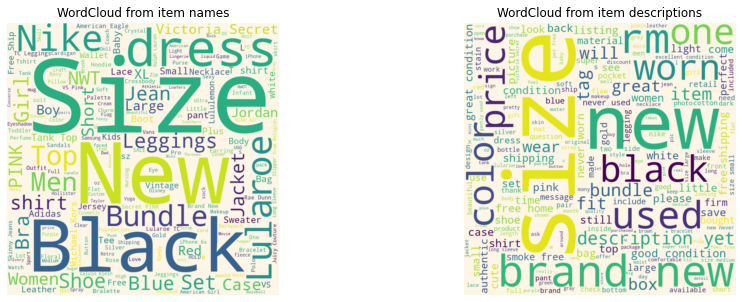

In [ ]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
wc = WordCloud(width = 800, height = 800, background_color='oldlace',
                stopwords = STOPWORDS, min_font_size = 10)

# plot the WordCloud image
plt.figure(figsize=(15,5), facecolor = None)

plt.subplot(1,2,1)
plt.title("WordCloud from item names")
wc.generate(" ".join(zero_priced_items["name"].values.ravel())) 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("WordCloud from item descriptions")
wc.generate(" ".join(zero_priced_items["item_description"].values.ravel())) 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")


plt.show()

- **Items being sold for price=0 do not have any significantly different properties from the rest of the items sold. These could either be outliers or there is a possibility that these items could have been donated through the platform.**

## <h2>3.10 Difference in distribution of log_price when grouped by "main_cat", "item_condition_id" and "shipping_id".</h2>

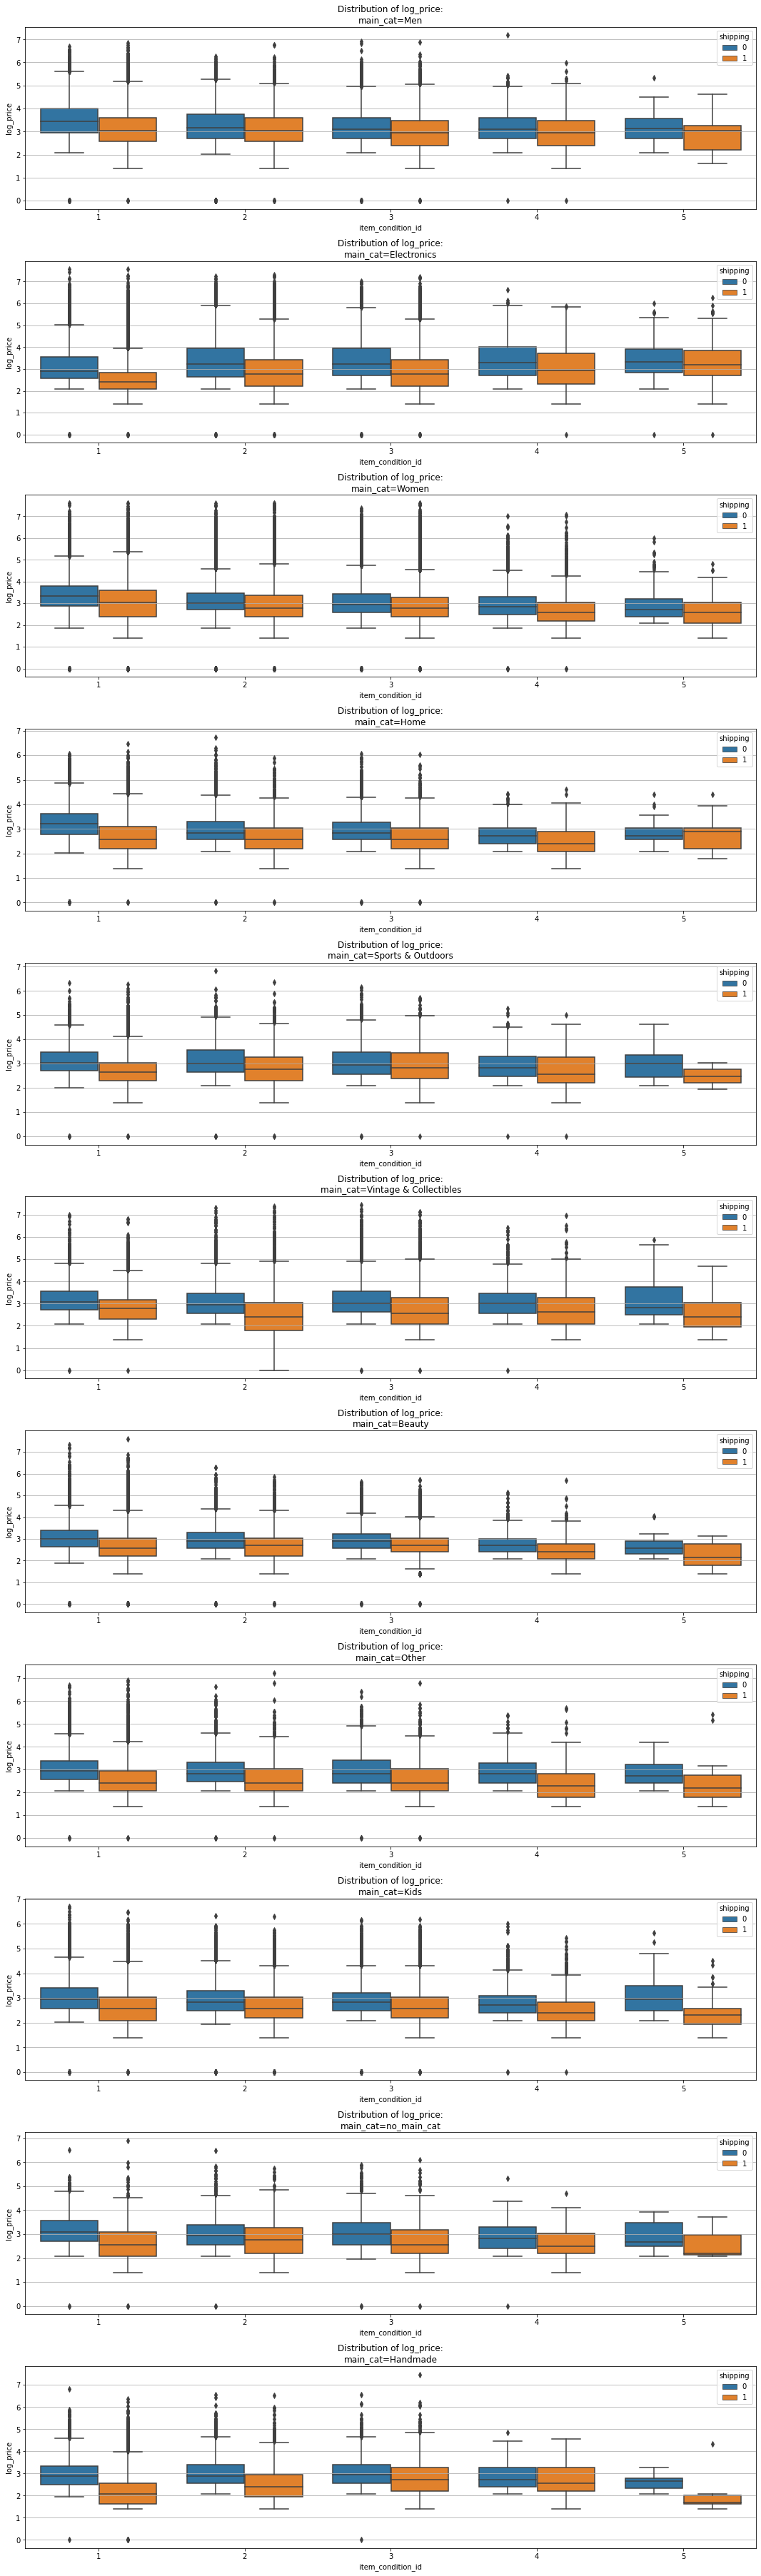

In [ ]:
plt.figure(figsize=(15,50), facecolor = None)

rows = train_df["main_cat"].nunique()
plot_no = 1

for cat in train_df["main_cat"].unique():
    plt.subplot(rows, 1, plot_no)
    plt.title(f"Distribution of log_price:\nmain_cat={cat}")
    plt.grid()
    plt.tight_layout(pad = 1)
    sns.boxplot(x="item_condition_id", y="log_price", hue="shipping", 
                data=train_df[train_df["main_cat"]==cat])
    plot_no = plot_no + 1

plt.show()

**Observation:**
1. The above plots show variations in log_price stats(min, mean, median, max, std. etc) when data is grouped by multiple columns together as it captures the effect of interaction between different variables.
2. Thus we could try having log_price stats(min, mean, median, max, std. etc) that is obtained after grouping by multiple columns as features while modeling.

<h4> <u>Note:</u> Much of multivariate analysis capturing the effect of interaction between variables is not done here except the above analysis, since the columns have high cardinality. The interaction effects between the variables would be captured while modelling. </h4>

## <h2>3.11 Summarized Observations:</h2>

1. **Type of problem:**
    - The problem is a regression problem to predict prices of the products listed in the platform.
    - Evaluation metric chosen is RMSLE. RMSLE reduces the effect of outliers on the final error calculations. Log also reduces the range of values a numerical data could have and thus helps in analysing data having wider range of values. 
2. **Data:**
    - Total rows in the dataset after removing duplicates = 1482486. This amount of data is sufficient for modelling.
    - "category_name", "brand_name" and "item_description" columns have Null values.
    - 42.67% of data points have "brand_name" missing.
    - **price:** 
        - Distribution of prices is heavily skewed to right.
        - Taking log of prices reduces the range of values to be predicted. We can train the model to predict log(prices) and optimize for RMSE rather than optimizing for RMSLE directly.
        - There are few items being sold for 0 price. But they do not have any significantly different properties from the rest of the items sold. These could either be outliers or there is a possibility that these items could have been donated through the platform.
    - **item_condition_id:** 
        - Data contains fewer samples with products in bad(5) condition and with item_condition_id equal to 4. There is not much of difference seen in the prices of products based on item_condition_id alone.
    - **shipping_id:**
        - Prices of products with shipping_id=0(shipping fee is paid by buyer) seems to be higher than products with shipping_id=1(shipping fee is paid by the seller).
    - **category_name:** 
        - category_name is hierarchical as shown below with 3 levels of category. Most of the products belong to Women's category ie; 44.8% of the whole dataset.
        - There is significant difference based on the category of which the product belongs to. 
        - Even though there is difference between mean and median log_price for few main categories the magnitude is smaller, hence it doesn't indicates that the log_price for those categories have few extreme values(significant higher or lower values compared to median). But checking the same for subcategories in the hierarchy could reveal some more insights.
    - **name:** 
        - Preprocessing "name" column by removing stopwords resulted in many samples having no words in "name" column, so its better to keep stopwords for "name" column since the number of words in "name" column is not much high.
        - Some of the item names also contain brand names in them.
    - **item_description:**
        - Higher priced items tend to have longer item descriptions but the inverse is not true (ie; not all items with longer descriptions have higher price). We could try out using the length and number of words in text columns as features.
        - There are descriptions which say "no description yet". This is equivalent to having no description and can be imputed with necessary missing value imputation chosen. 
    - **brand_name:** 
        - There are around 4803 unique brand names in the data and 42.67% of the whole data has no brand_names.
But there were brand names mentioned in item's name field. This information can be used by either combining "name" and "brand_name" columns together as one text column or we could use the "name" column to impute some of the known values to the "brand_name" column.<br/>
But it is necessary to note that some of the words in the "name" could be picked up as brand names even when they are not.<br/>
Ex: PINK (brand name) but when this is made case insensitive then it would mean it is same as the word "pink" that could be in item name or description to indicate the color of the product.
        - There are some brands that occur just one time in the whole data. We could try out the count info of brand names as a feature. This could represent popularity of brands among all the sold items.
        - The is a significant difference in the prices based on brand names.
        - Majority of the brands occur only once and few number of times. This also means that there is very less information about majority of the brands in the data.
3. Variations were seen in log_price stats(min, mean, median, max, std. etc) when data is grouped by multiple columns together as it captures the effect of interaction between different variables.
Thus we could try having log_price stats(min, mean, median, max, std. etc) that is obtained after grouping by multiple columns as features while modeling.